# **This notebook describes the Python code to decide the efficient number of neighbors in 'K-Nearest Neighbors' method for this dataset.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

voice.csv



# **Importing and Separating features and labels**

In [2]:
import pandas as pd
df = pd.read_csv('../input/voice.csv')

y=df.iloc[:,-1]
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


# **Converting string value to int type for labels**

In [3]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
#Male=1, Female=0
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

#**Data Standardization**

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [4]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# **Splitting dataset into training set and testing set for better generalization**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#**Running KNN with default hyperparameter.**

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

knn=KNeighborsClassifier() 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.965299684543


#**Running KNN for every possible value on this dataset**

Run the KNN Algorithm on various values of 'k'. The maximum possible value of 'k' possible is the number of instances in the training set.

In [7]:
k_range=list(range(1,len(X_train)))
acc_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_test,y_pred))

#**Plotting the Accuracy Values**

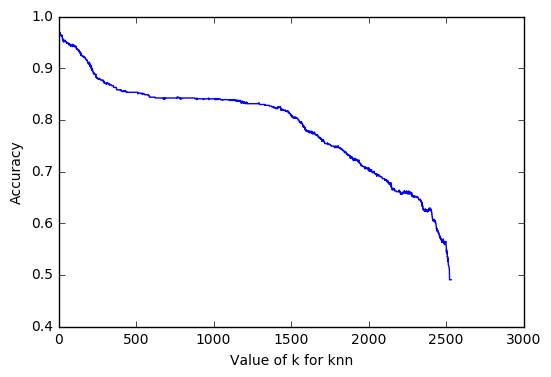

In [8]:
import matplotlib.pyplot as plt

k_values=list(range(1,len(X_train)))
plt.plot(k_values,acc_score)
plt.xlabel('Value of k for knn')
plt.ylabel('Accuracy')

As seen, the accuracy decreases when 'k' is increased on this dataset. Now, find the 'k' that gives highest accuracy score:

In [9]:
import operator

index, value = max(enumerate(acc_score), key=operator.itemgetter(1))
index

0

This returns the index value of '0' which corresponds to the k=1 case. The accuracy obtained is:

In [10]:
value

0.97160883280757093

#**CONCLUSION:**

**On this dataset, the k=1 value yields the best Accuracy Score of 97.16%.**